In [2]:
import os

from shapely.geometry import Polygon
import shapely.wkt
from shapely.geometry import shape

import starepandas
import geopandas

In [19]:
sdf = geopandas.read_file('../tests/data/hms_smoke20210209.zip')

In [20]:
sdf = starepandas.STAREDataFrame(sdf)

In [26]:
sids = sdf.make_sids(level=10, convex=False)
sdf.set_sids(sids, inplace=True)
trixels = sdf.make_trixels()
sdf.set_trixels(trixels, inplace=True)

<Axes: >

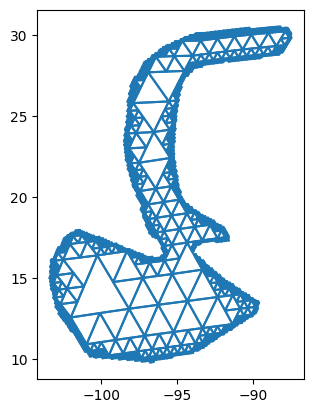

In [27]:
sdf[17:18].plot(column='Start')

In [29]:
s = sdf.reset_index().stare_dissolve(by='index', num_workers=1)

In [14]:
cover = s["sids"].to_numpy()
sdf['cover'] = cover

In [15]:
trixels = sdf.make_trixels(wrap_lon=True, n_partitions=1, num_workers=1)
sdf.set_trixels(trixels, inplace=True)

<Axes: >

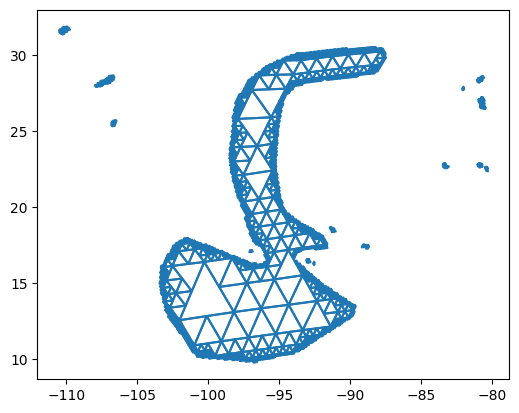

In [16]:
sdf.plot()

<Axes: >

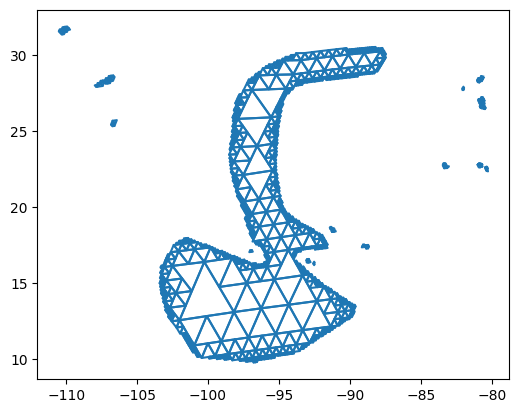

In [ ]:
t = sdf.make_trixels()
s = sdf.set_trixels(t)#.plot()
s.rename(columns={'geometry': 'poly'}, inplace=True)
s.plot()